# <center> **Exploratory Data Analysis** 

---

<center><img src="quote.PNG"></center>

# <center> **What Is Exploratory Data Analysis and Why should we care?**

> Many data scientists will agree that it is very easy to get lost in data—the more you collect, study and analyze, the more you want to explore. Rabbit holes of information are familiar and friendly places for data analysts and data scientists to dive into and spend hours extracting, modeling and analyzing these large datasets.

> Data is collected and housed in some sort of data repository. It could be as simple as a spreadsheet or as complex as a database that comprises multiple spreadsheets or datasets. Generally, the rows in a database are individual records while the columns are the various characteristics of each record. **But the human eye (and brain) can only scan so much data to analyze and learn from it. Exploratory data analysis allows analysts, scientists and business leaders to use visual tools to learn from the data.** 

### **Broader Classification**

> * Univariate Tabular <br>
> * Univariate Graphical <br>
> * Multi-variate Tabular <br>
> * Multi-variate Graphical

In [1]:
# Same sample as D1
import pandas as pd
df = pd.read_csv("Sample10k_Building_Permits.csv", sep=',', header=0)

In [44]:
cols_to_keep = ['Permit Number', 'Permit Type', 'Permit Creation Date', 'Permit Type Definition', \
                'Number of Existing Stories', 'Number of Proposed Stories',\
                'Estimated Cost', 'Revised Cost',\
                'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode']
df2 = df[cols_to_keep].copy()

In [3]:
df2.head()

,Permit Number,Permit Type,Permit Creation Date,Permit Type Definition,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,M766848,8,03/08/2017,otc alterations permit,NaN,NaN,NaN,1.0,6.0,Mission,94103.0
1,M762447,8,02/21/2017,otc alterations permit,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,201507161644,3,07/16/2015,additions alterations or repairs,2.0,9.0,6500000.0,11466000.0,3.0,Nob Hill,94109.0
3,201610049499,8,10/04/2016,otc alterations permit,2.0,2.0,40000.0,100000.0,4.0,Sunset/Parkside,94122.0
4,M470307,8,03/12/2014,otc alterations permit,NaN,NaN,NaN,1.0,2.0,Marina,94123.0


In [4]:
# NO NULLS
df2["Permit Type"].nunique()

8

In [5]:
# NO NULLS
df2["Permit Type"].unique()

array([8, 3, 4, 7, 6, 1, 2, 5], dtype=int64)

In [6]:
# WITH NULLS
df2["Neighborhoods - Analysis Boundaries"].unique()

array(['Mission', nan, 'Nob Hill', 'Sunset/Parkside', 'Marina',
       'Russian Hill', 'Bernal Heights', 'Twin Peaks', 'Noe Valley',
       'Pacific Heights', 'Tenderloin', 'South of Market',
       'Financial District/South Beach', 'Bayview Hunters Point',
       'Potrero Hill', 'West of Twin Peaks', 'Lakeshore',
       'Outer Richmond', 'Castro/Upper Market', 'Chinatown',
       'Inner Sunset', 'Haight Ashbury', 'Western Addition',
       'Hayes Valley', 'Presidio Heights', 'Japantown',
       'Oceanview/Merced/Ingleside', 'North Beach', 'Mission Bay',
       'Excelsior', 'Portola', 'Lone Mountain/USF', 'Inner Richmond',
       'Glen Park', 'Visitacion Valley', 'Seacliff', 'Outer Mission',
       'McLaren Park', 'Treasure Island', 'Presidio', 'Golden Gate Park',
       'Lincoln Park'], dtype=object)

In [7]:
# WITH NULLS
df2["Neighborhoods - Analysis Boundaries"].nunique()

41

In [8]:
df2["Permit Type Definition"].unique()

array(['otc alterations permit', 'additions alterations or repairs',
       'sign - erect', 'wall or painted sign', 'demolitions',
       'new construction', 'new construction wood frame',
       'grade or quarry or fill or excavate'], dtype=object)

In [29]:
df2["Permit Type Definition"].value_counts()

otc alterations permit                 8938
additions alterations or repairs        742
sign - erect                            183
new construction wood frame              43
demolitions                              41
wall or painted sign                     30
new construction                         16
grade or quarry or fill or excavate       7
Name: Permit Type Definition, dtype: int64

In [9]:
df2.isna().sum()

Permit Number                             0
Permit Type                               0
Permit Creation Date                      0
Permit Type Definition                    0
Number of Existing Stories             2123
Number of Proposed Stories             2181
Estimated Cost                         1898
Revised Cost                            307
Supervisor District                      83
Neighborhoods - Analysis Boundaries      83
Zipcode                                  83
dtype: int64

In [30]:
df2['Permit Creation Date'].dtype

dtype('O')

In [45]:
df2['Permit Creation Date'] = pd.to_datetime(df2['Permit Creation Date'])

In [46]:
df2['Permit Creation Date'].dt.year.unique()

array([2017, 2015, 2016, 2014, 2013, 2018, 2012], dtype=int64)

In [48]:
df2['Permit Creation Date'].dt.year.value_counts().sort_index()

2012       1
2013    1775
2014    1827
2015    1988
2016    1993
2017    2107
2018     309
Name: Permit Creation Date, dtype: int64

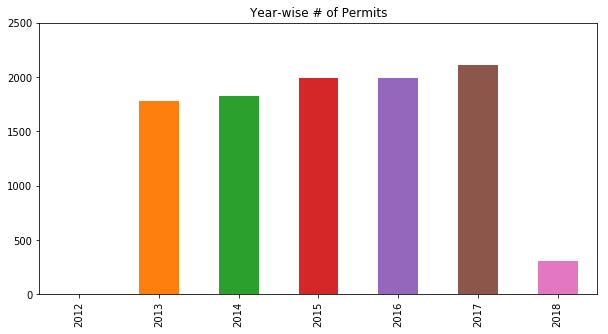

In [53]:
dt_table = df2['Permit Creation Date'].dt.year.value_counts().sort_index()

dt_table.plot(kind='bar', yticks=[500*x for x in arange(6)], title='Year-wise # of Permits', figsize=(10,5))

plt.show()

In [10]:
# A VERY NAIVE WAY - BUT VALID
#df2 = df2.fillna(0)
df2["Number of Existing Stories"] = df2["Number of Existing Stories"].fillna(0)

In [11]:
df2.head()

,Permit Number,Permit Type,Permit Creation Date,Permit Type Definition,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,M766848,8,03/08/2017,otc alterations permit,0.0,NaN,NaN,1.0,6.0,Mission,94103.0
1,M762447,8,02/21/2017,otc alterations permit,0.0,NaN,NaN,1.0,NaN,NaN,NaN
2,201507161644,3,07/16/2015,additions alterations or repairs,2.0,9.0,6500000.0,11466000.0,3.0,Nob Hill,94109.0
3,201610049499,8,10/04/2016,otc alterations permit,2.0,2.0,40000.0,100000.0,4.0,Sunset/Parkside,94122.0
4,M470307,8,03/12/2014,otc alterations permit,0.0,NaN,NaN,1.0,2.0,Marina,94123.0


In [12]:
# ROLL BACK
df2 = df[cols_to_keep].copy()

In [13]:
# DEFINING THE POSSIBLE NEW CONSTRUCTION TYPES
new_const_types = ['new construction', 'wall or painted sign', \
                   'new construction wood frame', 'grade or quarry or fill or excavate']


df2.loc[df2["Permit Type Definition"].isin(new_const_types), 'Number of Existing Stories'] = \
            df2.loc[df2["Permit Type Definition"].isin(new_const_types), 'Number of Existing Stories'].fillna(0)

In [14]:
df2.head()

,Permit Number,Permit Type,Permit Creation Date,Permit Type Definition,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,M766848,8,03/08/2017,otc alterations permit,NaN,NaN,NaN,1.0,6.0,Mission,94103.0
1,M762447,8,02/21/2017,otc alterations permit,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,201507161644,3,07/16/2015,additions alterations or repairs,2.0,9.0,6500000.0,11466000.0,3.0,Nob Hill,94109.0
3,201610049499,8,10/04/2016,otc alterations permit,2.0,2.0,40000.0,100000.0,4.0,Sunset/Parkside,94122.0
4,M470307,8,03/12/2014,otc alterations permit,NaN,NaN,NaN,1.0,2.0,Marina,94123.0


In [15]:
df2.isna().sum()

Permit Number                             0
Permit Type                               0
Permit Creation Date                      0
Permit Type Definition                    0
Number of Existing Stories             2027
Number of Proposed Stories             2181
Estimated Cost                         1898
Revised Cost                            307
Supervisor District                      83
Neighborhoods - Analysis Boundaries      83
Zipcode                                  83
dtype: int64

### Usual scikit-learn workflow

---

> * Import the function
> * Instantiate
> * Fit
> * transform

In [18]:
# IMPORT
from sklearn.preprocessing import Imputer

# INSTANTIATE
imputer_object = Imputer(missing_values='NaN', strategy='mean', axis=0)

# FIT
imputer_object.fit(df2.loc[~df2["Permit Type Definition"].isin(new_const_types), ['Number of Existing Stories']])

# TRANSFORM
df2.loc[~df2["Permit Type Definition"].isin(new_const_types), 'Number of Existing Stories'] = \
    imputer_object.transform(df2.loc[~df2["Permit Type Definition"].isin(new_const_types), ['Number of Existing Stories']])

In [ ]:
# SIMPLER EXAMPLE ON ENTIRE COLUMN WITHOUT SUBSET
# imputer_object = Imputer(missing_values='NaN', strategy='mean', axis=0)
# imputer_object.fit(df2.loc[~df2["Permit Type Definition"].isin(new_const_types), ['Number of Existing Stories']])
# df2['Number of Existing Stories'] = imputer_object.transform(df2[['Number of Existing Stories']])

In [19]:
df2.head()

,Permit Number,Permit Type,Permit Creation Date,Permit Type Definition,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,M766848,8,03/08/2017,otc alterations permit,5.747747,NaN,NaN,1.0,6.0,Mission,94103.0
1,M762447,8,02/21/2017,otc alterations permit,5.747747,NaN,NaN,1.0,NaN,NaN,NaN
2,201507161644,3,07/16/2015,additions alterations or repairs,2.000000,9.0,6500000.0,11466000.0,3.0,Nob Hill,94109.0
3,201610049499,8,10/04/2016,otc alterations permit,2.000000,2.0,40000.0,100000.0,4.0,Sunset/Parkside,94122.0
4,M470307,8,03/12/2014,otc alterations permit,5.747747,NaN,NaN,1.0,2.0,Marina,94123.0


In [20]:
df2['Number of Existing Stories'].describe()

count    10000.000000
mean         5.692568
std          7.659827
min          0.000000
25%          2.000000
50%          3.000000
75%          5.747747
max         63.000000
Name: Number of Existing Stories, dtype: float64

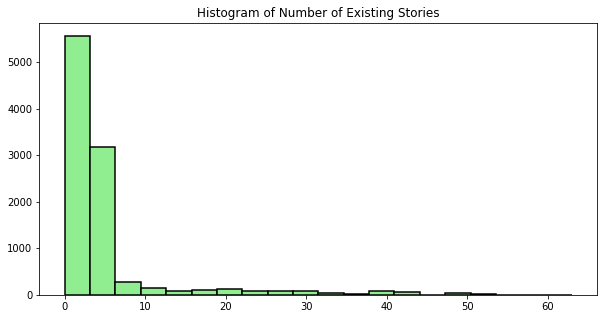

In [24]:
# BONUS CONTENT: https://accendoreliability.com/sturges-rule-method-selecting-number-bins-histogram/
xmin = df2['Number of Existing Stories'].min()
xmax = df2['Number of Existing Stories'].max()

from numpy import arange
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df2['Number of Existing Stories'], bins=20, color='lightgreen', histtype='bar', edgecolor='black', linewidth=1.5)
plt.xticks(arange(xmin, xmax, 10))
plt.title('Histogram of Number of Existing Stories')
plt.show()

In [25]:
df2.groupby('Permit Type Definition')['Number of Existing Stories'].mean().to_frame()

,Number of Existing Stories
Permit Type Definition,
additions alterations or repairs,3.997535
demolitions,1.658537
grade or quarry or fill or excavate,0.000000
new construction,0.000000
new construction wood frame,0.000000
otc alterations permit,5.881938
sign - erect,7.206272
wall or painted sign,0.000000


In [26]:
df2.groupby('Permit Type Definition')['Number of Existing Stories'].median()

Permit Type Definition
additions alterations or repairs       3.0
demolitions                            1.0
grade or quarry or fill or excavate    0.0
new construction                       0.0
new construction wood frame            0.0
otc alterations permit                 3.0
sign - erect                           4.0
wall or painted sign                   0.0
Name: Number of Existing Stories, dtype: float64

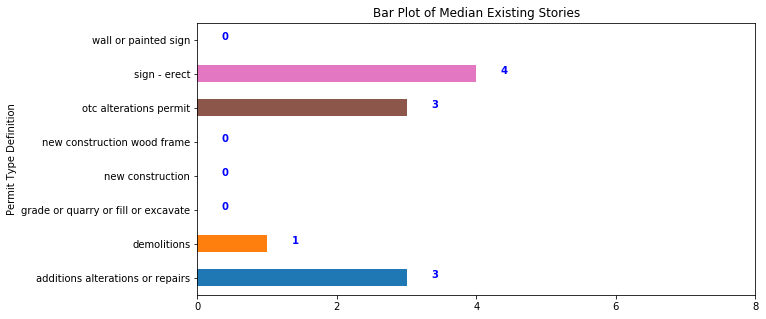

In [28]:
gb_table = df2.groupby('Permit Type Definition')['Number of Existing Stories'].median().astype(int)

gb_table.plot(kind='barh', xticks=[2*x for x in arange(5)], title='Bar Plot of Median Existing Stories', figsize=(10,5))

for i, v in enumerate(gb_table.values):
    plt.text(v + 0.35, i, str(v), color='blue', fontweight='bold')

plt.show()

# <center> **Questions we asked and answered today**

---

> * From which year(s) do we have the permit data? Which year(s) had the highest number of permits? <br>
> * List all possible permit types and their definitions <br>
> * What is the most reasonable way to treat missing entries in Number of Existing Stories? <br>
> * Frequency Distribution of Number of Existing Stories <br>
> * Average Number of Existing Stories by different Permit Types